In [1]:
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
import os
from Utils import *
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as dat

import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.4) # for label size

from Behavior_Drift import *

In [2]:
results = pd.read_csv('../output/aruba_real_life_results.csv')

# results = results[results.latent_dim == 10]
results.sort_values(['dataset','window_size'], ascending=True, inplace=True)
results.head(30)

,dataset,window_size,latent_dim,nb_cluster,silhouette,mse_loss,mae_acc
0,aruba,1,5,2,0.280506,0.017260,0.017260
1,aruba,1,10,2,0.264111,0.027017,0.027017
2,aruba,2,5,2,0.000000,0.015655,0.015655
3,aruba,2,10,4,0.191837,0.012962,0.012962
4,aruba,3,5,2,0.290285,0.007397,0.007397
5,aruba,3,10,2,0.186669,0.005891,0.005891
6,aruba,4,5,9,0.343194,0.005867,0.005867
7,aruba,4,10,9,0.203260,0.003876,0.003876
8,aruba,5,5,5,0.476011,0.005085,0.005085
9,aruba,5,10,2,0.229680,0.003284,0.003284


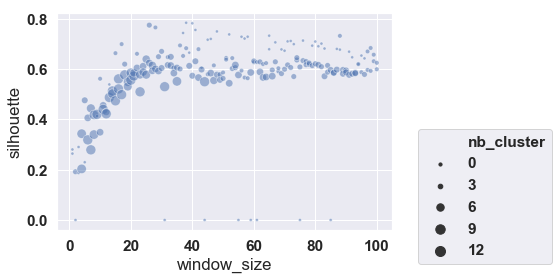

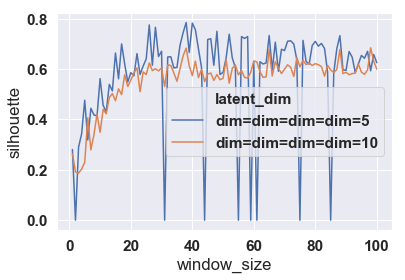

In [7]:
results['latent_dim'] = results.latent_dim.apply(lambda x : f"dim={x}")

sns.scatterplot(x='window_size', y='silhouette', size='nb_cluster', 
                sizes=(10, 100), alpha=0.5, data=results)
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5))

plt.figure()


sns.lineplot(x="window_size", y="silhouette", hue="latent_dim", data=results)

4.535

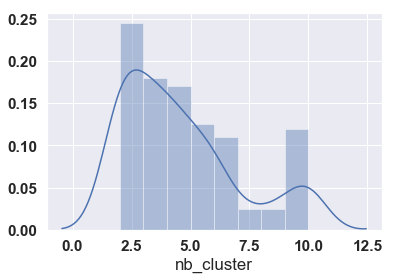

In [12]:
sns.distplot(results.nb_cluster)
np.mean(results.nb_cluster)